# CPSC-483-02 Assignment 1 
# Name : Mohit Kumar
# Name : Ishee Gattani

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as tts
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


## Question1 > Load and examine the Boston dataset’s features, target values, and description.

In [15]:
# Loading Boston House pricing data using load_boston()
boston = load_boston()
# features data to X 
X = pd.DataFrame(boston.data, columns=boston.feature_names)
# target data to Y
Y = pd.DataFrame(boston.target,columns=['MEDV'])
# describing data set 
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
#Inspect the target values 
Y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [17]:
# Shape of data X and Y both
X.shape, Y.shape

((506, 13), (506, 1))

In [18]:
# few head instances of the feature data
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
# few head instance of the target data
Y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## there are total 13 features in Data set
## All the features have numerical Values and are real numbers/Floating points

## Question 2 : Create a scatterplot showing the relationship between the feature LSTAT and the target value MEDV. Does the relationship appear to be linear?

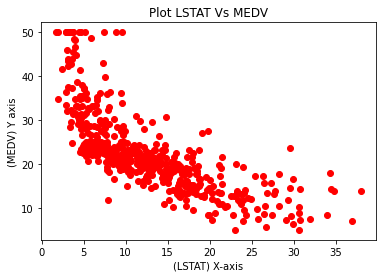

In [20]:
plt.scatter(X.LSTAT, Y.MEDV, c='r')
plt.xlabel('(LSTAT) X-axis')
plt.ylabel('(MEDV) Y axis')
plt.title('Plot LSTAT Vs MEDV');

## Answer :Yes, LSTAT and MEDV are in Linear relationship upto a great degree with negative slope.

## Question 3: Create and fit() an sklearn.linear_model.LinearRegression model using LSTAT as a predictor of MEDV. Using the coef_ and intercept_ attributes of the model, what is the equation for MEDV as a function of LSTAT?


In [21]:
# Selecting LSTAT and MEDV from X and Y
X_LSTAT = X['LSTAT'].values.reshape(-1,1)
y_MEDV = Y['MEDV'].values.reshape(-1,1)

In [22]:
# Fitting Linear Regression model on all the Data available
Lregressor = LinearRegression()
Lregressor.fit(X_LSTAT, y_MEDV)

LinearRegression()

In [23]:
#retrieving the intercept as w0:
print(Lregressor.intercept_)
w0 = Lregressor.intercept_

[34.55384088]


In [24]:
#retrieving the coef/slope as w1:
print(Lregressor.coef_)
w1 = Lregressor.coef_

[[-0.95004935]]


In [25]:
print("MEDV = %f + (%f) * LSTAT" %(w0, w1))

MEDV = 34.553841 + (-0.950049) * LSTAT


## MEDV = 34.553841 - 0.950049 * LSTAT

## Question 4: Use the predict() method of the model to find the response for each value of the LSTAT attribute in the dataset. Using sklearn.metrics.mean_squared_error(), find the average loss 𝓛 for the model.
## Question 5: Add a line to your scatter plot representing the least squares fit to the data. How well does the model fit the data?

Mean Squared Error on all the instances of Dataset using LSAT feature: 38.48296722989414


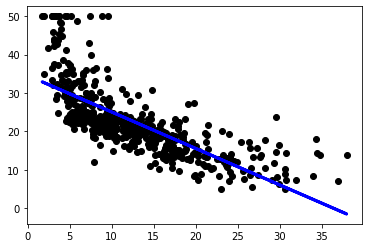

In [27]:
# Prediction on all the instanes
y_pred = Lregressor.predict(X_LSTAT)

print('Mean Squared Error on all the instances of Dataset using LSAT feature:', metrics.mean_squared_error(y_MEDV, y_pred))

plt.scatter(X_LSTAT, y_MEDV,  color='black')
plt.plot(X_LSTAT, y_pred, color='blue', linewidth=3)
plt.show()

## Answer: Mean Squared Error on all the instances of Datasetusing LSAT feature: 38.48296722989414

## Question 6 Now repeat experiments (3) and (4) using all 13 input features at the same time. How does the average loss change?

In [28]:

# Check for null values
X.isnull().any()

# selecting values of all columns
X_all_features = X[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']].values
Y_all_features = Y['MEDV'].values

#shape of the data set
X_all_features.shape
Y_all_features.shape


# fitting linear regression model on All instances with all features
L_all_regressor = LinearRegression()  
L_all_regressor.fit(X_all_features, Y_all_features)

LinearRegression()

In [29]:
y_pred_all = L_all_regressor.predict(X_all_features)
print('Mean Squared Error with full Dataset/All features:', metrics.mean_squared_error(Y_all_features, y_pred_all))

Mean Squared Error with full Dataset/All features: 21.894831181729202


## Mean Squared Error with full Dataset/All features: 21.894831181729202 as compared to LSAT 38.48296722989414. It has been reduced drastically.

## Question 7: Based on the coef_ attributes of the new model, which features are desirable in a home? Which features detract from its value?

In [30]:

coeff_df = pd.DataFrame(L_all_regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
CRIM,-0.108011
ZN,0.046420
INDUS,0.020559
CHAS,2.686734
NOX,-17.766611
RM,3.809865
AGE,0.000692
DIS,-1.475567
RAD,0.306049
TAX,-0.012335


## Answer : RM most desirable when RM value increase the value of the house increase most. CHAS is also a desirable feature
## NOX most undesirable NOX increases the value of house decreases

## Question: 8 Given the coef_ attributes, find the following for each feature: how much does a one unit increase in that feature change the median value of the home? Give your answer in dollars.

In [31]:

for i, features in enumerate(coeff_df.index):
  print(f"\nFor a unit increase in {features}, the median value of the house increases by {coeff_df.iloc[i, 0]} Dollars \n")

coeff_df.Coefficient.sort_values()


For a unit increase in CRIM, the median value of the house increases by -0.10801135783679539 Dollars 


For a unit increase in ZN, the median value of the house increases by 0.04642045836687953 Dollars 


For a unit increase in INDUS, the median value of the house increases by 0.020558626367068917 Dollars 


For a unit increase in CHAS, the median value of the house increases by 2.6867338193448442 Dollars 


For a unit increase in NOX, the median value of the house increases by -17.766611228299986 Dollars 


For a unit increase in RM, the median value of the house increases by 3.8098652068092282 Dollars 


For a unit increase in AGE, the median value of the house increases by 0.0006922246403431768 Dollars 


For a unit increase in DIS, the median value of the house increases by -1.47556684560025 Dollars 


For a unit increase in RAD, the median value of the house increases by 0.30604947898516427 Dollars 


For a unit increase in TAX, the median value of the house increases by -0.01233

NOX       -17.766611
DIS        -1.475567
PTRATIO    -0.952747
LSTAT      -0.524758
CRIM       -0.108011
TAX        -0.012335
AGE         0.000692
B           0.009312
INDUS       0.020559
ZN          0.046420
RAD         0.306049
CHAS        2.686734
RM          3.809865
Name: Coefficient, dtype: float64

## For a unit increase in CRIM, the median value of the house increases by -0.10801135783679539 Dollars 
## For a unit increase in ZN, the median value of the house increases by 0.04642045836687953 Dollars 
## For a unit increase in INDUS, the median value of the house increases by 0.020558626367068917 Dollars 
## For a unit increase in CHAS, the median value of the house increases by 2.6867338193448442 Dollars 
## For a unit increase in NOX, the median value of the house increases by -17.766611228299986 Dollars 
## For a unit increase in RM, the median value of the house increases by 3.8098652068092282 Dollars 
## For a unit increase in AGE, the median value of the house increases by 0.0006922246403431768 Dollars 
## For a unit increase in DIS, the median value of the house increases by -1.47556684560025 Dollars 
## For a unit increase in RAD, the median value of the house increases by 0.30604947898516427 Dollars 
## For a unit increase in TAX, the median value of the house increases by -0.012334593916574021 Dollars 
## For a unit increase in PTRATIO, the median value of the house increases by -0.9527472317072921 Dollars 
## For a unit increase in B, the median value of the house increases by 0.00931168327379375 Dollars 
## For a unit increase in LSTAT, the median value of the house increases by -0.5247583778554881 Dollars 

## Question : 9 Based on the amount of change in the value of the home, which features don’t seem to be important?

## Answer : ZN ,INDUS, AGE, TAX, B, are not important AS as the increase in these values does not effect the median house values by much amount